In [77]:
from PIL import Image, ImageDraw, ImageFont
import csv
import numpy as np
import matplotlib.pyplot as plt


image = Image.new('RGB', (100, 100), color = 'white')


draw = ImageDraw.Draw(image)


font = ImageFont.truetype('/content/Times New Roman.ttf', 52)


symbol = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
         'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

for i in range(len(symbol)):
  image = Image.new('RGB', (70, 70), color = 'white')

  draw = ImageDraw.Draw(image)
  draw.text((25, 0), symbol[i], font=font, fill='black')

  image.save(f'{symbol[i]}.png')

In [83]:
def centroid(image_path):

    with Image.open(image_path) as im:
        width, height = im.size
        area = 0
        mass_x = 0
        mass_y = 0

        # Масса и центр тяжести изображения
        for x in range(width):
            for y in range(height):
                r, g, b = im.getpixel((x, y))
              
                weight = 1 - (r + g + b) / (3 * 255)
                area += weight
                mass_x += weight * x
                mass_y += weight * y

        # Координаты центра тяжести
        if area != 0:
            centroid_x = mass_x / area
            centroid_y = mass_y / area
        else:
            centroid_x = centroid_y = 0

       
        normalized_centroid_x = centroid_x / width
        normalized_centroid_y = centroid_y / height

        with open('centroids.csv', 'w', newline='') as centroids_file:
            writer = csv.writer(centroids_file)
            writer.writerow(['centroid_x', 'centroid_y', 'normalized_centroid_x', 'normalized_centroid_y'])
            writer.writerow([centroid_x, centroid_y, normalized_centroid_x, normalized_centroid_y])

In [84]:
def quarter_weights(image_path):

    image = np.asarray(Image.open(image_path).convert('RGB'))

    height, width = image.shape[:2]


    q1 = image[0:height//2, 0:width//2]
    q2 = image[0:height//2, width//2:width]
    q3 = image[height//2:height, 0:width//2]
    q4 = image[height//2:height, width//2:width]


    q1_weight = np.sum(q1 == 0)
    q2_weight = np.sum(q2 == 0)
    q3_weight = np.sum(q3 == 0)
    q4_weight = np.sum(q4 == 0)

    total_weight = q1_weight + q2_weight + q3_weight + q4_weight
    q1_norm_weight = q1_weight / total_weight
    q2_norm_weight = q2_weight / total_weight
    q3_norm_weight = q3_weight / total_weight
    q4_norm_weight = q4_weight / total_weight


    q1_area = q1.size
    q2_area = q2.size
    q3_area = q3.size
    q4_area = q4.size


    q1_norm_weight = q1_weight / q1_area
    q2_norm_weight = q2_weight / q2_area
    q3_norm_weight = q3_weight / q3_area
    q4_norm_weight = q4_weight / q4_area


    with open('q1_nORMweight.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Quarter 1 NWeight', 'Quarter 2 NWeight', 'Quarter 3 NWeight', 'Quarter 4 NWeight'])
        writer.writerow([q1_norm_weight, q2_norm_weight, q3_norm_weight, q4_norm_weight])


    with open('q_weight.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Quarter 1 Weight', 'Quarter 2 Weight', 'Quarter 3 Weight', 'Quarter 4 Weight'])
        writer.writerow([q1_norm_weight, q2_norm_weight, q3_norm_weight, q4_norm_weight])
        

    return q1_norm_weight, q2_norm_weight, q3_norm_weight, q4_norm_weight

In [85]:
def moments(image_path):
   
    image = np.asarray(Image.open(image_path).convert('L'))
    
    # Моменты инерциии
    ix = np.sum(image * np.square(np.arange(image.shape[1]) - np.mean(np.arange(image.shape[1])))[None, :], axis=1)
    iy = np.sum(image * np.square(np.arange(image.shape[0]) - np.mean(np.arange(image.shape[0])))[:, None], axis=0)
    
    # Нормирование
    norm_ix = ix / np.sum(image)
    norm_iy = iy / np.sum(image)

    with open('q_momentum.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(['ix', 'iy', 'norm_ix', 'norm_iy'])
      writer.writerow([ix, iy, norm_ix, norm_iy])


In [185]:
def profiles(image_path):
    image = np.asarray(Image.open(image_path).convert('L'))
    img_res = np.zeros_like(image)

   
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
          if (image[i][j].all() == 0):
            img_res[i][j] = 255


    #Вычисляем профили X и Y изображения
    profile_x = np.mean(img_res, axis=0)
    profile_y = np.mean(img_res, axis=1)

    # Строим диаграммы профилей
    fig, axes = plt.subplots(nrows=2, figsize=(6, 6))
    axes[0].bar(range(len(profile_x)), profile_x)
    axes[0].set_title('Профиль X')
    axes[1].bar(range(len(profile_y)), profile_y)
    axes[1].set_title('Профиль Y')

    # Сохраняем диаграмму в файл PNG
    fig.savefig('profiles.png')


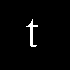

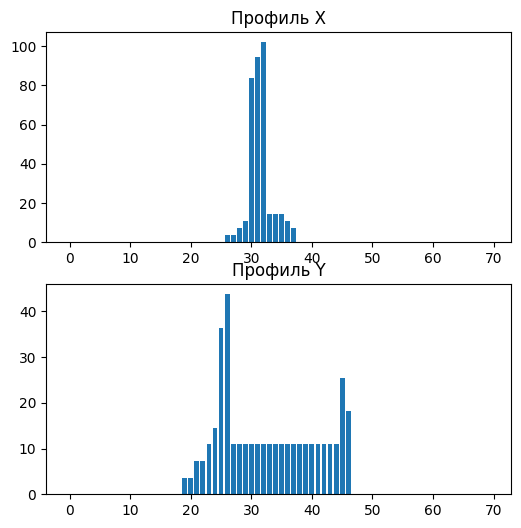

In [184]:
centroid('/content/t.png')
quarter_weights('/content/t.png')
moments('/content/t.png')
profiles('/content/t.png')